## Python statistics essential training - 05_04_crossvalidation

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [6]:
file = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter5\05_02\gapminder.csv'

gapminder = pd.read_csv(file)

gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


In [7]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Model formulas from the last two videos

In [9]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving'
         '+ age5_surviving:region - age5_surviving + population')

In [10]:
shuffled = gdata.sample(len(gdata))

In [11]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [12]:
surviving = smf.ols(f_surviving, data=training).fit()

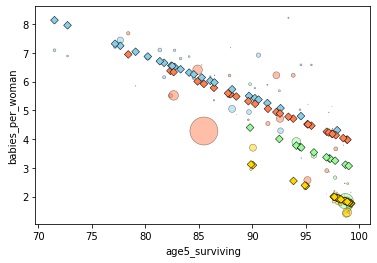

In [13]:
plotfit(surviving,training)

In [14]:
surviving.mse_resid

0.8955052757652933

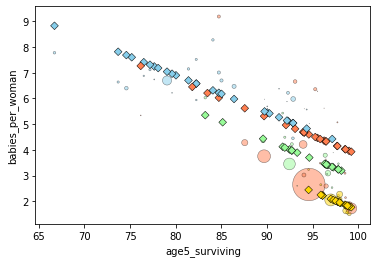

In [15]:
plotfit(surviving,testing)

In [16]:
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model - 1
np.sum(resid**2) / df

1.061879956539512

In [17]:
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
        
        ret.append(mse)
    
    return np.mean(ret)

In [18]:
cross_validate(gdata,f_groupmeans,'babies_per_woman')

1.6733234491056121

In [19]:
cross_validate(gdata,f_surviving,'babies_per_woman')

1.0523725905365835

In [20]:
cross_validate(gdata,f_srp,'babies_per_woman')

1.2308436845098574